# How to run the code

All code in this repository that has been developed for the final is contained in the module ```final.py```. All other code is separated into many other files and was developed for the midterm. 

To run the code for the final, open a python envrironment in the directory and import the module using ```import final.py```.

The module contains functions to find the fourier transform and inverse fourier transform of a data set, calculate the temperature in Kelvin from a tempreature in degreed Fahrenheit, list the files in a directory that contain a certain string and a certain file extension, and several unsuccessful attempts at curve fitting algorithms. 

## Bibliography
We used the following resources to complete this project:

* Information on the os library from [os library documentation]([text](https://docs.python.org/3/library/os.html))

* Radius of the Earth from [University of South Florida Geophysics]([text](https://gscommunitycodes.usf.edu/geoscicommunitycodes/public/geophysics/Gravity/earth_shape.php))

* ChatGPT for help with producing the algorithms

* Dr. Tim Thomay's lecture slides for PHY410/505 Computational Physics 1 at University at Buffalo

* [UBSUNY Github Catalog]([text](https://github.com/ubsuny)) for general algorithm help

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import final as fin

In the following cell, we produce a plot of our GPS motion. The plot assumes that longitude/latitude directly correspond to the x-y plane. We convert to meters by multiplying by the radius of the Earth. 

When we took our data, we walked from East to West for the odd indexed data and (from the endpoint of the preceeding data trial) walked West to East for the even indexed trials. This means that if we take our starting point as the origin, all values on the x (longitudinal) axis would be negative for the odd indexed trials. We decide instead to make the end point our origin and shift our data accordingly. Also, since trials of different parity have a different starting and ending point, we shift all data according to the end point of the **first trial**. That way, all data aligns in the way that it should.

All trials are fit seperately using the ```scipy.optimize wrapper``` from  ```final.py.``` since I wan unable to get ```fin.curve_fit``` to function exactly as intended.

We see there are some stray data points (largely beneath the legend) that skew our fits and make some of them quite bad. 

The data for the legend is collected from the markdown files first.

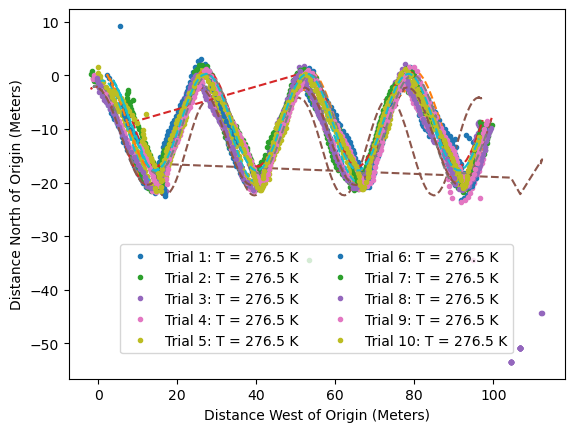

In [5]:
#Produce Figure of GPS motion with axes in meters and origin at starting point

#Get all Temperatures
T = []
for i in range(10):
    T = np.loadtxt(
        fin.list_files('/workspaces/CP1-24-final/iglesias-cardinale/Final/Data', 'ic0', '.md')[i],
        skiprows=5,
        delimiter = ',',
        unpack=True)

#Covert temperatures to Kelvin
T_K = fin.fahrenheit_to_kelvin(T)

#Initialize lists to plot
tlist = []
latlist = []
lonlist = []

#Loop over all files using list_files function from final.py and add their data to the overall lists
for i in range(10):
    (t, lat, lon, alt, alt84, speed, 
    direction, distance, sigma_horz_meters, sigma_alt_meters, satellites) = np.loadtxt(
        fin.list_files('/workspaces/CP1-24-final/iglesias-cardinale/Final/Data', 'ic0', '.csv')[i],
        skiprows=1,
        delimiter = ',',
        unpack=True)

    tlist.append(t)
    latlist.append(lat)
    lonlist.append(lon)

#Set origin as final position of first trial 
# (setting  origin as initial makes all x-data negative and i think that's ugly)
# and multiply latitude and longitude by 
# radius of the Earth in meters to get meters on axes

lat_centered = []
lon_centered = []

for lat in latlist:
    lat_centered.append((lat - latlist[0][-1])*63781.37)
for lon in lonlist:
    lon_centered.append((lon - lonlist[0][-1])*63781.37)

#Plot all the data with the legend
for i in range(len(lat_centered)):
    plt.plot(lon_centered[i],lat_centered[i], '.', label = f'Trial {i+1}: T = {round(T_K,1)} K')
    plt.plot(lon_centered[i],fin.sine(lon_centered[i],*fin.sinefit_wrapper(lon_centered[i], lat_centered[i], p0 = [-20, 1/3.5, -20, -10])), linestyle = '--')

plt.xlabel('Distance West of Origin (Meters)')
plt.ylabel('Distance North of Origin (Meters)')
plt.legend(ncol = 2, bbox_to_anchor=(0.5, 0.05), loc='lower center');

# Fourier Transforms

The next couple of cells contain snippets that plot the fast fourier transform and fast inverse fourier transform of our sine walk data.

We see most of our data seems to have a frequency between 0 and 10 $\frac{1}{100m}$. This seems reasonable, but they really should all be the same since our data (at least as plotted) has very significant overlap.

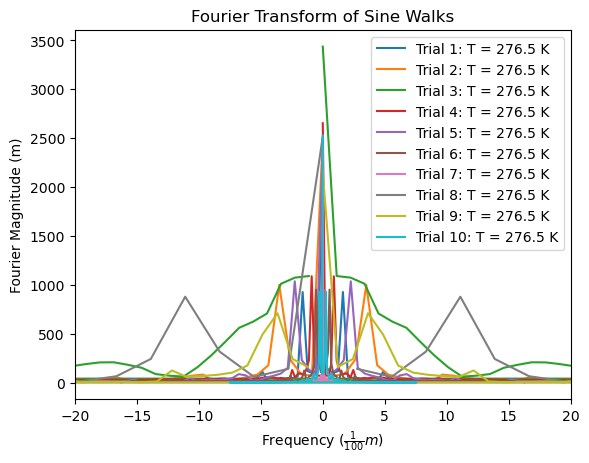

In [12]:
for i in range(len(lat_centered)):
    freq, mag, result = fin.forward_fft(lon_centered[i], lat_centered[i])
    plt.plot(freq, mag, label = f'Trial {i+1}: T = {round(T_K,1)} K')

plt.legend()
plt.xlabel('Frequency ($\\frac{1}{100}m$)')
plt.xlim(-20,20)
plt.ylabel('Fourier Magnitude (m)')
plt.title('Fourier Transform of Sine Walks');

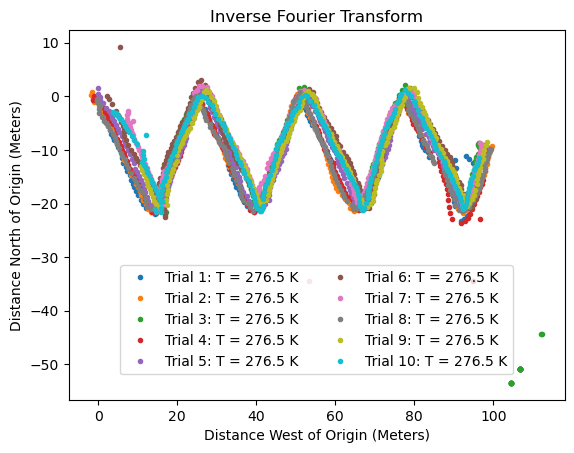

In [24]:
for i in range(len(lat_centered)):
    freq, mag, spectrum = fin.forward_fft(lon_centered[i], lat_centered[i])
    plt.plot(lon_centered[i], fin.inverse_fft(spectrum), '.', label = f'Trial {i+1}: T = {round(T_K,1)} K')

plt.xlabel('Distance West of Origin (Meters)')
plt.ylabel('Distance North of Origin (Meters)')
plt.title('Inverse Fourier Transform')
plt.legend(ncol = 2, bbox_to_anchor=(0.5, 0.05), loc='lower center');